In [109]:
from vector_drawing import *

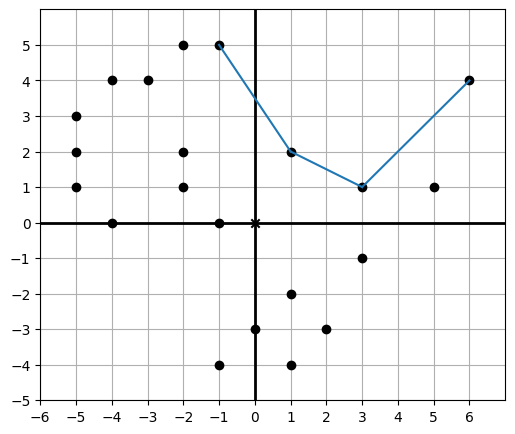

In [110]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
                (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
                (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
                ]

draw(
    Points(*dino_vectors),
    Segment((6, 4), (3, 1)),
    Segment((3, 1), (1, 2)),
    Segment((1, 2), (-1, 5))
)

### 問2.2
(2, -2) の点と対応する矢印を描画せよ。

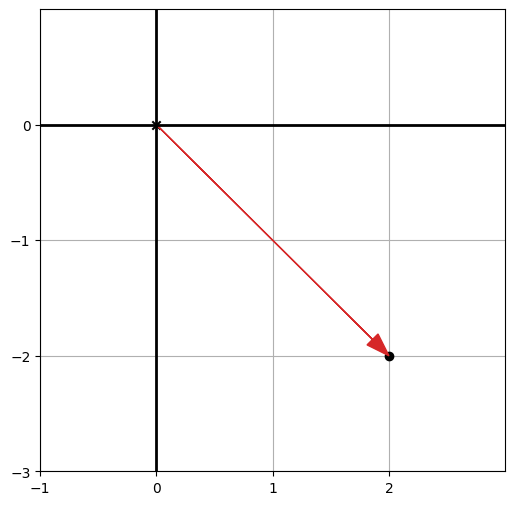

In [111]:
draw(
    Points((2, -2)),
    Arrow((2, -2))
)

### 問2.4
dino_vectors を頂点とする Polygon オブジェクトを作成して頂点を繋ぎ恐竜を描け

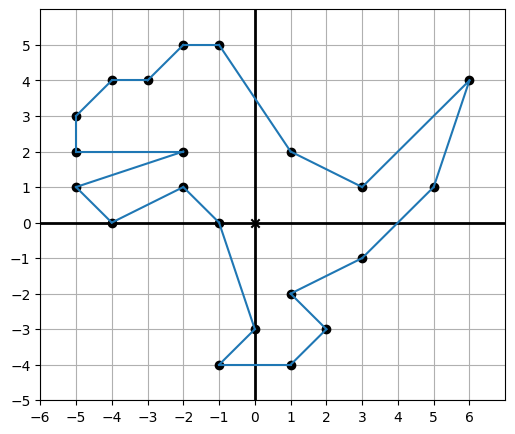

In [112]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
                (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
                (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
                ]

draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

### 問2.5
draw 関数を用いて x = -10 から x = 10 までの x に対するベクトル(x, x**2) を点で描け

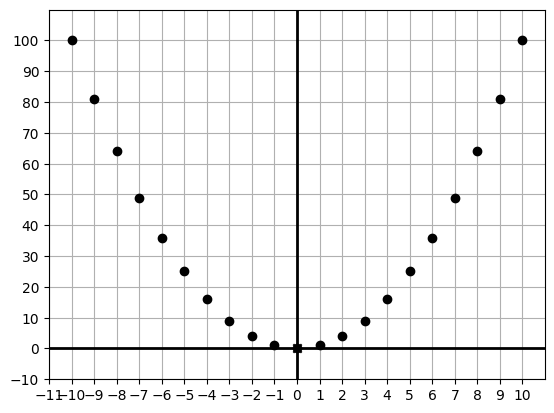

In [113]:
draw(
    Points(*[(x, x**2) for x in range(-10, 11)]),
    grid=(1, 10),
    nice_aspect_ratio=False
)

### 2.2 平面ベクトル演算
ベクトルはそれぞれの要素を足し合わせることで **ベクトル和** を得ることができる。
ベクトル和は一方の要素の終点 (tip) をもう一方の要素の始点 (tail) とすることでも求められるため、 **tip-to-tail加算** とも呼ばれる。

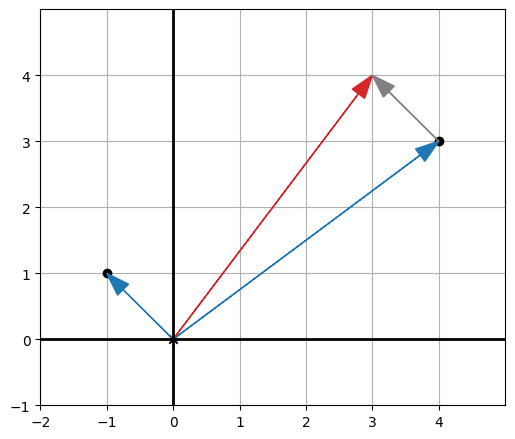

In [114]:
def add(v1: (float, float), v2: (float, float)):
    return v1[0] + v2[0], v1[1] + v2[1]


a = (4, 3)
b = (-1, 1)
s = add(a, b)
draw(
    Points(a, b),
    *[Arrow(v, color=blue) for v in [a, b]],
    Arrow(s),

    # ベクトル和(s)と足し合わされた要素(a)との距離は、もう一方の要素(b)の長さと等しい
    Arrow(s, a, color=gray),
)

上図はベクトルの加算が b(-1, 1) を a の分だけ **並行移動** させられることを示している。
この性質を利用して、先ほどの恐竜を平行に移動させることができる。

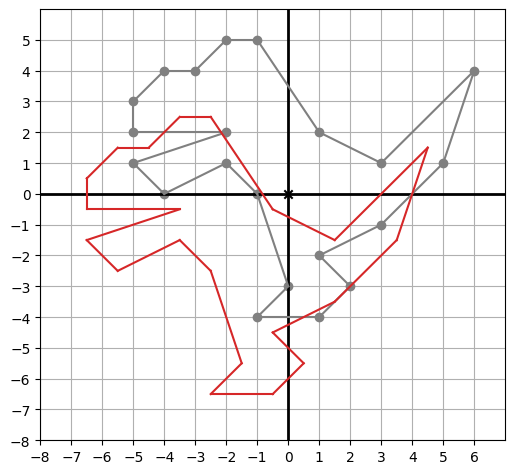

In [115]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
                (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
                (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
                ]

draw(
    Points(*dino_vectors, color=gray),
    Polygon(*dino_vectors, color=gray),
    Polygon(*[add(v, (-1.5, -2.5)) for v in dino_vectors], color=red)
)

## 2.1.1 ベクトルの成分と長さ

ベクトルの矢印の長さは、各成分の長さを三角形の各辺としてピタゴラスの定理で求められる。

ピタゴラスの定理を用いた斜辺求め方
$\[c = \sqrt{a^2 + b^2}\]$

In [116]:
from math import sqrt

def length(v: (float, float)):
    return sqrt(v[0]**2 + v[1]**2)

## 2.2.2 スカラー倍

ベクトルの掛け算は **スカラー倍** という。またベクトル (例: `(1, 5)` など) に対して通常の数字を **スカラー** という。スカラーは「スケール (拡大縮小) するもの」という意味として覚えられる。
スカラー倍はベクトルが成す直角三角形の縦横比を変えずに拡大する。

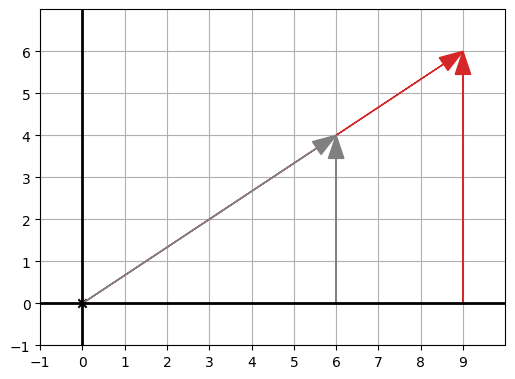

In [117]:
vector = (6, 4)
s = (vector[0] * 1.5, vector[1] * 1.5)

draw(
    Arrow(s),
    Arrow(vector, color=gray),
    Arrow(vector, (vector[0], 0), color=gray),
    Arrow(s, (s[0], 0), color=red),
)

## 2.2.3 減算、変位、距離
### 減算
ベクトルvの逆ベクトルは -1•v である。このことからベクトルの減算は以下のように表現できるため、加算として求められ、その性質 (tip-to-tailが適用できる) も同じとなる。

$v-w = v+(-1•w)$

v-wの減算によって求められるベクトル (図のグレーか赤の矢印) を wからvへの **変位** と呼ぶ。

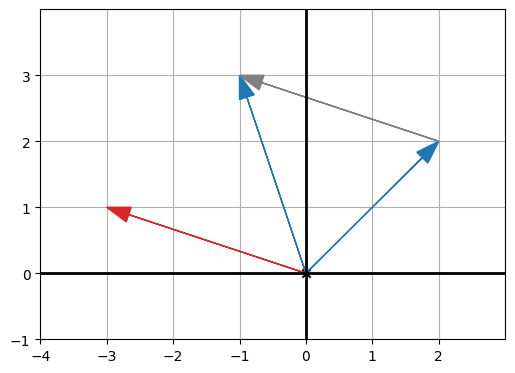

In [118]:
v = (-1, 3)
w = (2, 2)
ww = (w[0]*-1, w[1]*-1)
vw = add(v, ww)

draw(
    Arrow(v, color=blue),
    Arrow(w, color=blue),
    Arrow(vw, color=red),
    Arrow(v, w, color=gray)
)

wからのvへの変位の長さは次のようにピタゴラスの定理を用いて計算できる。変位はベクトル (数の組み) であるのに対して長さはスカラ (1つの数) であることに注意。特にスカラからベクトルへの変換はできない。

In [119]:
length(vw)

3.1622776601683795

## 2.2.4 練習問題

In [120]:
# [2.6] ベクトル u = (-2, 0), v = (1.5, 1.5), w = (4, 1) のとき、 u + v, v + w, u + w, u + v + w を計算せよ
u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

print(f"u + v = {add(u, v)}")
print(f"v + w = {add(v, w)}")
print(f"u + w = {add(u, w)}")
print(f"u + v + w = {add(add(u, v), w)}")

u + v = (-0.5, 1.5)
v + w = (5.5, 2.5)
u + w = (2, 1)
u + v + w = (3.5, 2.5)


In [121]:
# [2.7] mini-project
# 任意個のベクトルを引数に取る add function を実装せよ
def add(*vectors: list[(float, float)]) -> (float, float):
    return sum(v[0] for v in vectors), sum(v[1] for v in vectors)

# これによって先ほどの u + v + w を書き直すと以下のようになる
print(f"u + v + w = {add(u, v, w)}")

u + v + w = (3.5, 2.5)


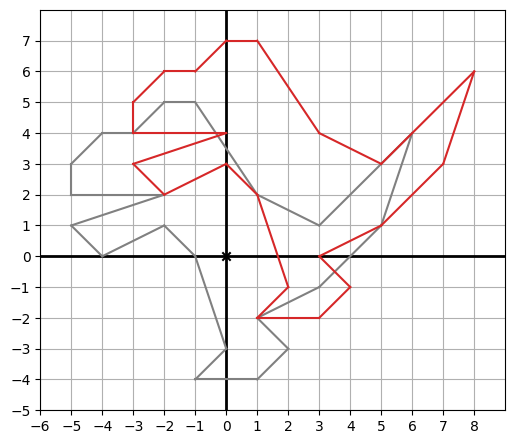

In [122]:
# [2.8]
# 任意個のベクトルのリストを平行移動させる translate() 関数を実装せよ
def translate(translation: (float, float), vectors: list[(float, float)]) -> list[(float, float)]:
    return [add(translation, v) for v in vectors]

# これを利用して dino_vectors を平行移動させる
draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*translate((2, 2), dino_vectors), color=red),
)

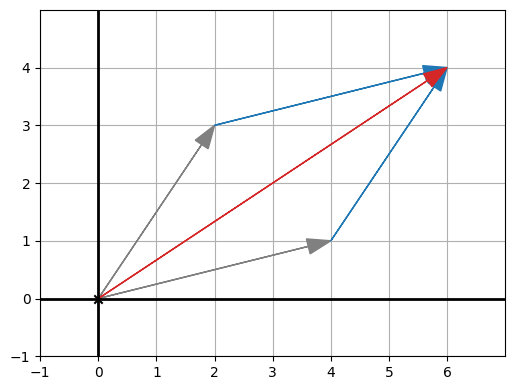

In [130]:
# [2.9] ミニプロジェクト
# v + w, w + v が等しいことを座標上のベクトルの和の性質を用いて説明し、等しいことを示す図形を描画せよ

# v + w = (a, b) + (c, d) = (a + c, b + d) となり、スカラの加算は交換法則が成り立つ。ゆえに v + w = w + v

v = (2, 3)
w = (4, 1)
vw = add(v, w)

draw(
    Arrow(v, color=gray),
    Arrow(w, color=gray),

    # tip-to-tail (v->w)
    Arrow(vw, w, color=blue),

    # tip-to-tail (w->v)
    Arrow(vw, v, color=blue),

    Arrow(vw, color=red),
)